# Funciones de distribución de probabilidades

## Distribución Uniforme
Con esta Distribución conseguimos que todos los números tengan la misma probabilidad.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
a=1
b=100
n=1000000
#Cuanto mas mayor sea n mas probabilidad de uniformidad
data=np.random.uniform(a,b,n)

Para que se aprecie que todos tienen la misma probabilidad debemos generar un número considerable de datos (n), dependiendo del rango de valores posibles (a,b)

(array([100087.,  99848., 100164., 100015.,  99759., 100429.,  99950.,
         99803.,  99677., 100268.]),
 array([ 1.00002025, 10.90001288, 20.80000551, 30.69999815, 40.59999078,
        50.49998341, 60.39997604, 70.29996867, 80.1999613 , 90.09995393,
        99.99994657]),
 <a list of 10 Patch objects>)

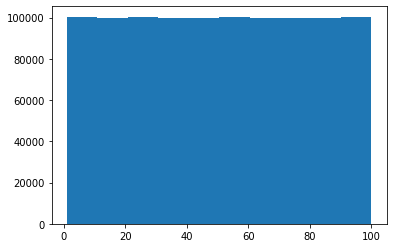

In [9]:
%matplotlib inline
plt.hist(data)

## Distribución Normal (Campana de Gauss)

### Distribución normal estándar

Caracterizada por tener media 0 y desviación típica 1

In [10]:
n=1000000
data=np.random.randn(n)

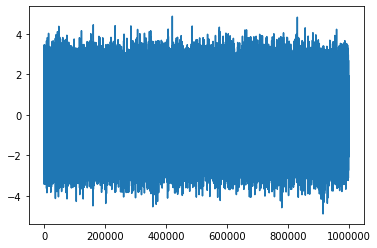

In [11]:
x=range(1,n+1)
plt.plot(x,data)

(array([4.50000e+01, 1.65200e+03, 2.30360e+04, 1.37656e+05, 3.33981e+05,
        3.36295e+05, 1.40685e+05, 2.49070e+04, 1.69900e+03, 4.40000e+01]),
 array([-4.88056605, -3.90664096, -2.93271588, -1.95879079, -0.98486571,
        -0.01094062,  0.96298446,  1.93690954,  2.91083463,  3.88475971,
         4.8586848 ]),
 <a list of 10 Patch objects>)

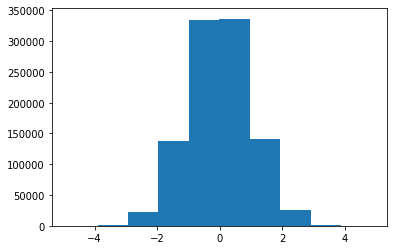

In [12]:
%matplotlib inline
plt.hist(data)

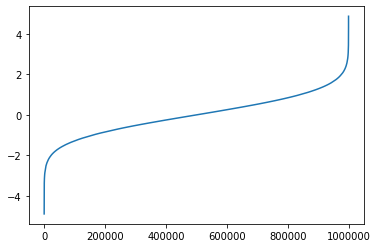

In [16]:
plt.plot(x,sorted(data))

### Distribución normal no estándar

Caracterizada por no tener media 0 ni desviación típica 1

(array([  22.,  132.,  694., 1849., 2899., 2535., 1368.,  420.,   70.,
          11.]),
 array([-3.612196  , -1.71345865,  0.18527869,  2.08401604,  3.98275338,
         5.88149073,  7.78022807,  9.67896542, 11.57770276, 13.4764401 ,
        15.37517745]),
 <a list of 10 Patch objects>)

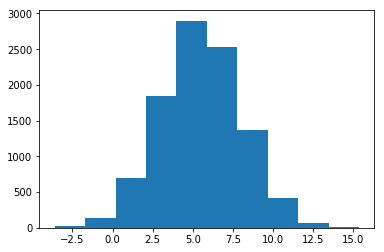

In [28]:
mu = 5.5 #media
sd = 2.5 #desviación típica
Z_10000=np.random.randn(10000)
#Z=(X-mu)/sd -> N(0,1), X=mu+sd*Z
data = mu + sd*np.random.randn(10000)
plt.hist(data)

In [19]:
def randn_non_standard(mu, sd, n):
    Z = np.random.randn(n)
    return mu + sd * Z

## La simulación de Monte-Carlo

Probabilidad=casos_favorables/casos_posibles

* Generamos dos números aleatorios x e y entre 0 y 1 en total 1000 veces
* Calcularemos x * x + y * y:
    * Si el valor es inferior a 1 -> estamos dentro del círculo
    * Si el valor es superior a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo
* Usamos dicha probabilidad para aproximar el valor de π
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π, siendo las veces igual a las aproximaciones
* Calculamos el promedio de los (100) experimentos anteriores para dar un valor final de π
   

In [35]:
def pi_montecarlo(n,n_exp):
    pi_avg=0
    pi_value_list=[]
    for i in range(n_exp):
        value=0
        x=np.random.uniform(0,1,n).tolist()
        y=np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z=np.sqrt(x[j]*x[j]+y[j]*y[j])
            if z<=1:
                value+=1
        float_value=float(value)
        pi_value=float_value*4/n
        pi_value_list.append(pi_value)
        pi_avg+=pi_value
    return (pi_avg/n_exp,plt.plot(pi_value_list))

(3.1422760000000007, [<matplotlib.lines.Line2D at 0x12a5ca668>])

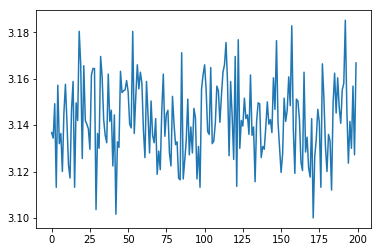

In [36]:
pi_montecarlo(10000,200)

## Dummy Data Sets

In [24]:
n = 10000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), # normal standard
        'B' : randn_non_standard(mu=1.5, sd=2.5, n=n), # normal non-standard
        'C' : np.random.uniform(low=5, high=32, size=n) # uniform
    }
)

Si comprobamos los datos la media y la desviación típica de la segunda columna se aproximan mucho a los valores que hemos puesto al generar el dataframe. En cuanto a la distribución uniforme (columna C) la media debe ser el valor central, en este caso, 5 + (32-5)/2 = 18.5. Los mínimos y los máximos también coinciden. Con lo cual, podemos afirmar que el dummy data set se ha generado correctamente.

In [26]:
data.describe()

,A,B,C
count,1.000000e+07,1.000000e+07,1.000000e+07
mean,3.145180e-05,1.499403e+00,1.850089e+01
std,1.000120e+00,2.500866e+00,7.793705e+00
min,-5.137311e+00,-1.148060e+01,5.000001e+00
25%,-6.743019e-01,-1.883294e-01,1.175166e+01
50%,1.587203e-04,1.499565e+00,1.850192e+01
75%,6.748561e-01,3.186897e+00,2.524938e+01
max,5.208367e+00,1.568565e+01,3.200000e+01


También podemos hacer un histograma de cada columna y verlo gráficamente:

Text(0.5, 1.0, 'Uniform')

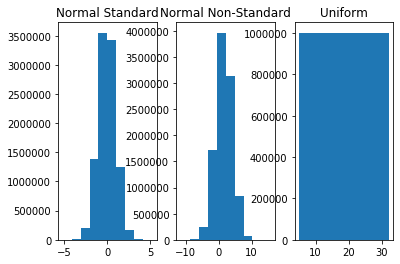

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes.flatten()

ax0.hist(data['A'])
ax0.set_title('Normal Standard')

ax1.hist(data['B'])
ax1.set_title('Normal Non-Standard')

ax2.hist(data['C'])
ax2.set_title('Uniform')